In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from src.nn_handler import NNHandler

## 1. Get training and validation datasets

In this case, the MNIST datasets will be used.

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

training_data = datasets.MNIST(root='../data', train=True, download=True,
                               transform=transforms.Compose([
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.1307,), (0.3081,))
                               ]))

test_data = datasets.MNIST(root='../data', train=False, download=True,
                           transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))
                           ]))


## 2. Load the model

The model here, can't find the module where the network architecture was defined.

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# an error is expected here
model = NNHandler.load("../models/test_model_code_5.pth", device)

ModuleNotFoundError: No module named 'MNIST_model'

Here's the code saved with the model

In [4]:
model_code = NNHandler.load_model_code("../models/test_model_code_5.pth")[0]
print(model_code)

import torch
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


/mnt/c/Users/npayo/Qsync/Maitrise/Projects/NNHandler/src/nn_handler.py:1104: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage = storage_type(size)


The model trained exclusively in the jupyter notebook can't find the architecture either.

In [5]:
# an error is expected here
print(NNHandler.load("../models/model_state_epoch_5.pth", device).model_code)

AttributeError: Can't get attribute 'Net' on <module '__main__'>

However, if we allow `NNHandler` to execute the code for the model from its save file, it works. You therefore don't even need to send the code with the checkpoint file as long as you have the `NNHandler` class.

**Note**: the saved code doesn't support modules yet so all the architecture should be defined in the same '.py' file.

In [9]:
model = NNHandler.load("../models/test_model_code_5.pth", device, load_from_code=True)

## 5. Plot results

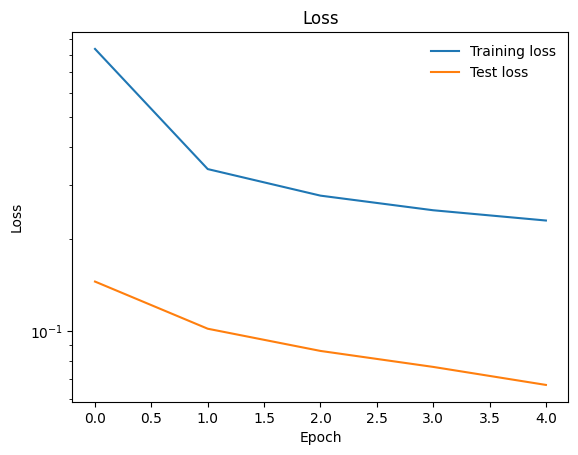

In [7]:
model.plot_losses(True)

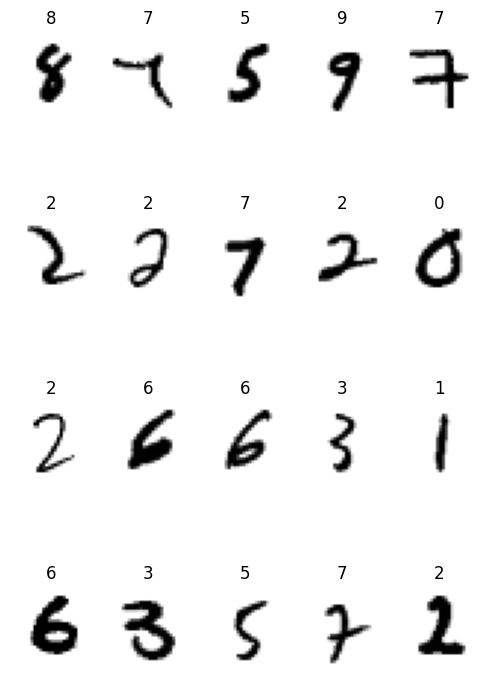

In [8]:
from matplotlib import pyplot as plt

# Plot n samples from the validation dataset with their predictions
n = 20
test_loader = torch.utils.data.DataLoader(test_data, batch_size=n, shuffle=True)
data_iter = iter(test_loader)
images, labels = data_iter.__next__()

# Get predictions
model.eval()
with torch.no_grad():
    images = images.to(device)
    outputs = model(images)

_, predicted = torch.max(outputs, 1)

plt.figure(figsize=(5, n // 5 * 2))
for index in range(n):
    plt.subplot(n // 5, 5, index + 1)
    plt.axis('off')
    plt.imshow(images[index].cpu().numpy().squeeze(), cmap='gray_r')
    plt.title('%i' % predicted[index])

plt.tight_layout()
